### Importamos todas las librerias a usar

In [14]:
import math
import scipy.stats as st
from IPython.display import display, Markdown, Latex
import pandas as pd
import matplotlib.pyplot as plt
import IPython.core.display as di
import numpy as np
import matplotlib.image as mpimg
from scipy.stats import f


# Pregunta N°1
Los siguientes datos corresponden a la cantidad de artículos (X)  y a su precio (Y) en soles de siete paquetes de exportación de un producto:

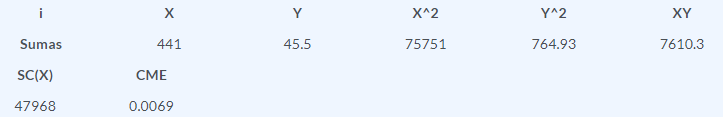

Si el modelo de regresión lineal estimado es Y_Estimado-O.2696+O.0989X, halle el intervalo de confianza para el precio de un paquete que tiene 70
artículos, utilice una confianza del 90% e interprete. (Utilizar 4 decimales en sus cálculos).

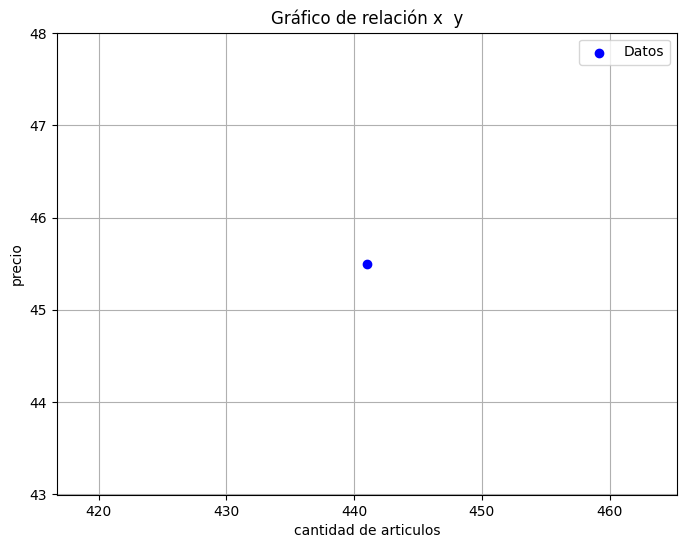

,X,Y,X*Y,X^2,Y^2
0,441,45.5,7610.3,75751,764.93
1,441,45.5,7610.3,75751,764.93


Media (X) = 63.0
Media (Y) = 6.5
Usando las Formulas:


$$\widehat{\beta}_{1}=\frac{n\sum XY-\sum X\sum Y}{n\sum X^{2}-(\sum X)^{2}}$$

$$\widehat{\beta}_{0}=\frac{\sum Y-\widehat{\beta}_{1}\sum X}n$$


PASO 1
B1 = 33206.6 / 335776  = 0.0989

PASO 2
B0 = 1.8851000000000013 / 7  = 0.2696

Ecuacion de Pronostico
Y = 0.2696 0.0989 X
B1 = Cuando el cantidad de articulos aumenta en 1 la precio en promedio
     aumenta 0.0989
B0 = Cuando el cantidad de articulos sea 0 o minimo la precio en promedio
     será de 0.2696 

halle el intervalo de confianza para el precio de un paquete que tiene 70 artículos, utilice una confianza del 90% e interprete.
Respuesta Pregunta = 7.1926

SC(X) = 75751 - 27783.0 = 47968
CME = 764.93 - 7 * 42.25 - 0.0989 * 7610.3 - 7 * 409.5 / 6 = 0.0069
T-Student: T(1-a/2,n-2) = 2.015

- Intervalo de Confianza
Limite Inferior: 7.12911110274688 
Limite Superior: 7.256088897253119


In [17]:
# Opciones = "Prediccion" "Confianza" "Ambos" / "nada"
tipoIntervalo = "Confianza"

# Datos
a = 0.1
pregunta = "halle el intervalo de confianza para el precio de un paquete que tiene 70 artículos, utilice una confianza del 90% e interprete."
VariableX = 70
x = [441]
TextX = "cantidad de articulos"
y = [45.5]
TextY = "precio"
n = 7

#------------------------------------------------
# Creacion y muestra en pantalla del grafico
plt.figure(figsize=(8, 6))
plt.scatter(x, y, color='blue', label='Datos')
# Personalizar el gráfico
plt.title('Gráfico de relación x  y')
plt.xlabel(TextX)
plt.ylabel(TextY)
plt.grid(True)
plt.legend()
# Mostrar el gráfico
plt.show()
#-----------------------------------------------

promedio_x = sum(x)/n
promedio_y = sum(y)/n

# Calculo x*y | x^2 | y^2
xy=[7610.3]
x2=[75751]
y2=[764.93]
"""for posC,numero in enumerate(x):
    valorXY = numero*y[posC]
    valorX2 = numero**2
    valorY2 = y[posC]**2
    xy.append(valorXY)
    x2.append(valorX2)
    y2.append(valorY2)"""

# Creando Tabla
Tabla1 = {
    'X': x+[sum(x)],
    'Y': y+[sum(y)],
    'X*Y': xy+[sum(xy)],
    'X^2': x2+[sum(x2)],   
    'Y^2': y2+[sum(y2)]  
}
df = pd.DataFrame(Tabla1)
df = df.rename(index={n:'TOTAL'})

# Mostrar el DataFrame
display(df)

print("Media (X) =",promedio_x)
print("Media (Y) =",promedio_y)

# CALCULO DE COEFICIENTES PRACTICO
print("Usando las Formulas:")
display(di.Markdown("$$\widehat{\\beta}_{1}=\\frac{n\sum XY-\sum X\sum Y}{n\sum X^{2}-(\sum X)^{2}}$$"))
display(di.Markdown("$$\widehat{\\beta}_{0}=\\frac{\sum Y-\widehat{\\beta}_{1}\sum X}n$$"))
# PASO 1.
NuB1 = (n*sum(xy))-(sum(x)*sum(y))
DeNB1 = (n*sum(x2))-(sum(x)**2)
B1 = 0.0989
print("\nPASO 1\nB1 =",NuB1,"/",DeNB1," =",B1)

# PASO 2.
NuB0 = (sum(y)-B1*sum(x))
B0 = 0.2696
print("\nPASO 2\nB0 =",NuB0,"/",n," =",B0)

# Ecuacion de Pronostico:
print("\nEcuacion de Pronostico\nY =",B0,B1,"X")
estado = ""
if B1<0:
    estado="disminuye"
else:
    estado="aumenta"

print("B1 = Cuando el",TextX,"aumenta en 1 la",TextY,"en promedio\n    ",estado,abs(B1))
print("B0 = Cuando el",TextX,"sea 0 o minimo la",TextY,"en promedio\n     será de",abs(B0),"\n")

# Calculo de pregunta reemplazando la variable
PronosticoXy = B0+(B1*VariableX)
print(pregunta)
print("Respuesta Pregunta =",PronosticoXy)


# -----------------------------------------------------
#           Calculo de Intervalos

# Hallar la sumatoria SC(X)
ScX = 47968

# Hallamos CME
p_CME = 0.0069

# Calculamos T Student
gl= n-2
T = round(st.t.ppf(1-(a/2),df=gl),4)

if tipoIntervalo == "Ambos":
    print("\nSC(X) =",sum(x2),"-",n * promedio_x**2,"=",ScX)
    print("CME =", sum(y2), "-", n, "*", promedio_y**2, "-", B1, "*", sum(xy), "-", n, "*", (promedio_x * promedio_y), "/", n - 1, "=", p_CME)
    print("T-Student: T(1-a/2,n-2) =",T)
    # Para El Intervalo de Prediccion:
    Ip_Linf = PronosticoXy - T * math.sqrt(p_CME*(1+1/n+(VariableX-promedio_x)**2/ScX))
    Ip_LiSup = PronosticoXy + T * math.sqrt(p_CME*(1+1/n+(VariableX-promedio_x)**2/ScX))
    print("\n- Intervalo de Prediccion\nLimite Inferior:",Ip_Linf,"\nLimite Superior:",Ip_LiSup)
    # Para el Intervalo de Confianza:
    Ic_Linf = PronosticoXy - T * math.sqrt(p_CME*(1/n+(VariableX-promedio_x)**2/ScX))
    Ic_LiSup = PronosticoXy + T * math.sqrt(p_CME*(1/n+(VariableX-promedio_x)**2/ScX))
    print("\n- Intervalo de Confianza\nLimite Inferior:",Ic_Linf,"\nLimite Superior:",Ic_LiSup)
elif tipoIntervalo == "Prediccion":
    print("\nSC(X) =",sum(x2),"-",n * promedio_x**2,"=",ScX)
    print("CME =", sum(y2), "-", n, "*", promedio_y**2, "-", B1, "*", sum(xy), "-", n, "*", (promedio_x * promedio_y), "/", n - 1, "=", p_CME)
    print("T-Student: T(1-a/2,n-2) =",T)
    # Para El Intervalo de Prediccion:
    Ip_Linf = PronosticoXy - T * math.sqrt(p_CME*(1+1/n+(VariableX-promedio_x)**2/ScX))
    Ip_LiSup = PronosticoXy + T * math.sqrt(p_CME*(1+1/n+(VariableX-promedio_x)**2/ScX))
    print("\n- Intervalo de Prediccion\nLimite Inferior:",Ip_Linf,"\nLimite Superior:",Ip_LiSup)
elif tipoIntervalo == "Confianza":
    print("\nSC(X) =",sum(x2),"-",n * promedio_x**2,"=",ScX)
    print("CME =", sum(y2), "-", n, "*", promedio_y**2, "-", B1, "*", sum(xy), "-", n, "*", (promedio_x * promedio_y), "/", n - 1, "=", p_CME)
    print("T-Student: T(1-a/2,n-2) =",T)
    # Para el Intervalo de Confianza:
    Ic_Linf = PronosticoXy - T * math.sqrt(p_CME*(1/n+(VariableX-promedio_x)**2/ScX))
    Ic_LiSup = PronosticoXy + T * math.sqrt(p_CME*(1/n+(VariableX-promedio_x)**2/ScX))
    print("\n- Intervalo de Confianza\nLimite Inferior:",Ic_Linf,"\nLimite Superior:",Ic_LiSup)
elif tipoIntervalo=="nada":
    print("No piden Intervalos")

# Pregunta N°2
Los siguientes datos corresponden a los pesos (X) en kg y consumo de comida (Y) en kg de 7 perros por dos semanas:

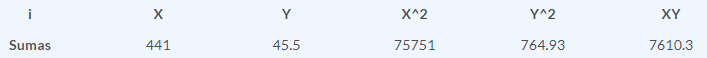

Si el modelo de regresión lineal estimado es Y_Estimado=O.2696+O 0989X , calcule e interprete los coeficientes de correlación y determinación. (Utilizar 4 decimales en sus cálculos).

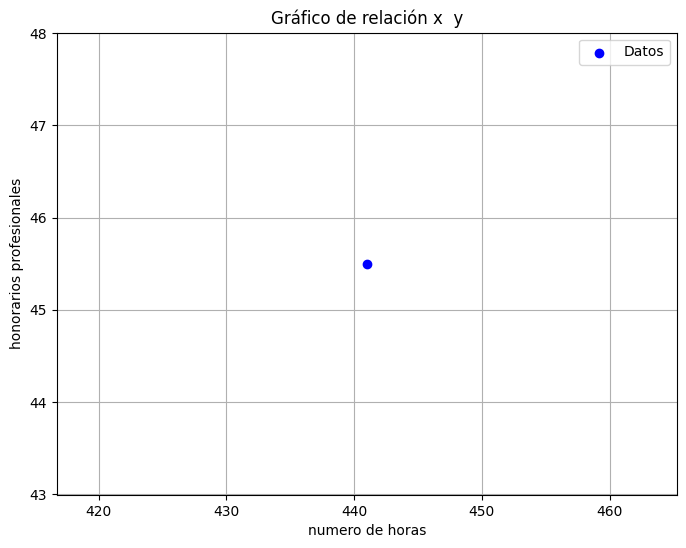

,X,Y,Y*X,X^2,Y^2
0,441,45.5,7610.3,75751,764.93
1,441,45.5,7610.3,75751,764.93



Coeficiente de Correlacion (r)


$$r =\frac{33206.6}{\sqrt{335776} \cdot \sqrt{3284.2599999999993}}=1.0$$

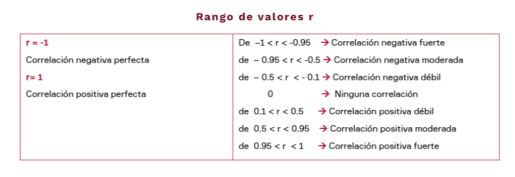


PASO 1


$$\widehat{\beta}_{1}=\frac{n\sum XY-\sum X\sum Y}{n\sum X^{2}-(\sum X)^{2}}$$

$$\widehat{\beta}_{1}=\frac{53272.1-20065.5}{530257-194481}=0.0989$$


PASO 2


$$\widehat{\beta}_{0}=\frac{\sum Y-\widehat{\beta}_{1}\sum X}n$$

$$\widehat{\beta}_{0}=\frac{45.5-43.6149}7=0.2696$$


Ecuacion de Pronostico
Y = 0.2696 + 0.0989 X
Promedio 6.5


,Yi=B0+B1X,SCR,SCE
0,43.8845,1397.6008,2.6098
1,43.8845,1397.6008,2.6098



SCT = 1397.6008 + 2.6098  = 1400.2106

Coeficiente de Determinacion (R^2):
 1397.6 / 1400.21 = 0.9981 -> 99.81 %


In [25]:
# Datos
#pregunta= "¿Cuánto en Promedio recibirá de propina un moso que se ha demorado en atender 3.5 minutos?"
#VariableX = 3.5
x = [441]
TextX = "numero de horas"
y = [45.5]
TextY = "honorarios profesionales"
n = 7

#------------------------------------------------
# Creacion y muestra en pantalla del grafico
plt.figure(figsize=(8, 6))
plt.scatter(x, y, color='blue', label='Datos')
# Personalizar el gráfico
plt.title('Gráfico de relación x  y')
plt.xlabel(TextX)
plt.ylabel(TextY)
plt.grid(True)
plt.legend()
# Mostrar el gráfico
plt.show()
#-----------------------------------------------

# Calculo x*y | x^2 | y^2
xy=[7610.3]
x2=[75751]
y2=[764.93]
"""for posC,numero in enumerate(x):
    valorXY = numero*y[posC]
    valorX2 = numero**2
    valorY2 = y[posC]**2
    xy.append(valorXY)
    x2.append(valorX2)
    y2.append(valorY2)"""


#-----------Crear un DataFrame -------------
Tabla1 = {
    'X': x+[sum(x)],
    'Y': y+[sum(y)],
    'Y*X': xy+[sum(xy)],
    'X^2': x2+[sum(x2)],   
    'Y^2': y2+[sum(y2)]
}
df = pd.DataFrame(Tabla1)
df = df.rename(index={n:'TOTAL'})
# Mostrar el DataFrame
display(df)

# Calculo de coeficiente de Correlacion
print("\nCoeficiente de Correlacion (r)")
r = round((n * sum(xy) - sum(x) * sum(y)) / (math.sqrt(n * sum(x2) - (sum(x) ** 2)) * math.sqrt(n * sum(y2) - (sum(y) ** 2))),3)
display(di.Markdown(fr"$$r =\frac{{{n * sum(xy) - sum(x) * sum(y)}}}{{\sqrt{{{n * sum(x2) - (sum(x) ** 2)}}} \cdot \sqrt{{{n * sum(y2) - (sum(y) ** 2)}}}}}={r}$$"))

# Cargar la imagen
imagen = mpimg.imread("../Images/rangoValoresR.png")
# Mostrar la imagen
plt.imshow(imagen)
plt.axis('off')  # Desactivar los ejes
plt.show()

#-----------------------------------------------------------------
# Calculo de coeficiente de Determinacion -> Solo aplica para Regresion Lineal Simple
# CfD = round(r**2,4)
# print("Coeficiente de Determinacion Forma Simple =",CfD," ->",CfD*100,"%")
#----------------------------------------------------------
# Calculo de coeficiente de Determinacion -> Como debe de ser

# CALCULO DE COEFICIENTES PRACTICO
# PASO 1.
NuB1 = (n*sum(xy))-(sum(x)*sum(y))
DeNB1 = (n*sum(x2))-(sum(x)**2)
B1 = 0.0989
print("\nPASO 1")
display(di.Markdown("$$\widehat{\\beta}_{1}=\\frac{n\sum XY-\sum X\sum Y}{n\sum X^{2}-(\sum X)^{2}}$$"))
display(di.Markdown(fr"$$\widehat{{\beta}}_{{1}}=\frac{{{(n*sum(xy))}-{(sum(x)*sum(y))}}}{{{(n*sum(x2))}-{(sum(x)**2)}}}={B1}$$"))

# PASO 2.
NuB0 = (sum(y)-B1*sum(x))
B0 = 0.2696
print("\nPASO 2")
display(di.Markdown("$$\widehat{\\beta}_{0}=\\frac{\sum Y-\widehat{\\beta}_{1}\sum X}n$$"))
display(di.Markdown(fr"$$\widehat{{\beta}}_{{0}}=\frac{{{(sum(y))}-{B1*sum(x)}}}{n}={B0}$$"))

# Ecuacion de Pronostico:
print("\nEcuacion de Pronostico\nY =",B0,"+",B1,"X")

# Calculamos Y=B0+B1X
yBoB1X = []
for posC,numero in enumerate(x):
    valor = round(B0+B1*numero,4)
    yBoB1X.append(valor)
promedioyBoB1X = sum(y)/n

# Calculamos SCR
Scr = []
for posC,numero in enumerate(yBoB1X):
    valor = round((numero-promedioyBoB1X)**2,4)
    Scr.append(valor)

# Calculamos SCE
Sce = []
for posC,numero in enumerate(yBoB1X):
    valor = round((numero-y[posC])**2,4)
    Sce.append(valor)

# Crear un DataFrame 
Tabla2 = {
    'Yi=B0+B1X': yBoB1X+[sum(yBoB1X)],
    'SCR': Scr+[sum(Scr)],   
    'SCE': Sce+[sum(Sce)]  
}
tb2 = pd.DataFrame(Tabla2)
tb2 = tb2.rename(index={n:'TOTAL'})
# Mostrar el DataFrame
display(tb2)

# Calculamos SCT
Sct = round(sum(Scr)+sum(Sce),4)
print("\nSCT =",sum(Scr),"+",sum(Sce)," =",Sct)

# Calculamos R^2
r2 = sum(Scr)/Sct
print("\nCoeficiente de Determinacion (R^2):\n",round(sum(Scr),2),"/",round(Sct,2),"=",round(r2,4),"->",round(r2,4)*100,"%")

# Pregunta N°3
Se tienen los siguientes datos recolectados de seis familias; el gasto de alimentación (Y) en miles soles, ingresos (X_1) en miles de soles y cantidad de integrantes (X_2):

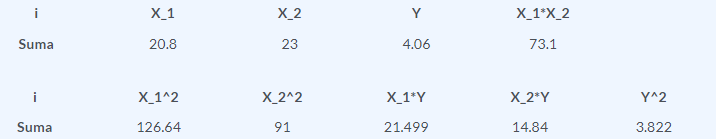

Formule el sistema de ecuaciones para hallar el modelo de regresión lineal múltiple que estima el gasto de alimentación familiar en función a los ingresos y cantidad de integrantes por familia e interprete los coeficientes de regresión: B_0=-0.1727, B_1=0.1469, B_2=0.0887.

,X1,X2,Y,X1*Y,X2*Y,X1*X2,X1^2,X2^2
0,20.8,23,4.06,21.499,14.84,73.1,126.64,91
1,20.8,23,4.06,21.499,14.84,73.1,126.64,91


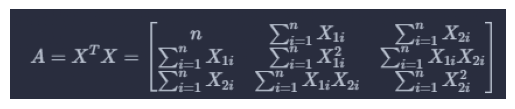

Matriz:
[[  6.    20.8   23.  ]
 [ 20.8  126.64  73.1 ]
 [ 23.    73.1   91.  ]]

Matriz inversa:
[[ 9.32137363 -0.31897566 -2.09971948]
 [-0.31897566  0.02563871  0.06002473]
 [-2.09971948  0.06002473  0.49346967]]

Matriz 3x1:
[[ 4.06 ]
 [21.499]
 [14.84 ]]

Producto de matrices:
[[-0.17271785]
 [ 0.1469324 ]
 [ 0.08870057]]

Modelo de Regresion Estimado
Y =  -0.17271785358791458 + 0.14693240430730248 X1 + 0.08870057008415633 X2


,Yi=B0+B1X+B2X,SCR,SCE
0,4.9236,16.8346,0.7458
1,4.9236,16.8346,0.7458



SCT = 16.8346 + 0.7458  = 17.5804

Coeficiente de Determinacion (r^2):
 16.83 / 17.58 = 0.9576 -> 95.76 %
El 81.1% de la variabilidad de la variable Resistencia es explicado por el modelo de regresión ajustado


In [12]:
# Datos
a = 0.05 # -> General
y = [4.06]
X1 = [20.8]
X2 = [23]
n = 6

# Calculo de Sumas X1/X2/Y/X1*Y/X2*Y/X1*X2/X1^2/X2^2
X1xY=[21.499]
X2xY=[14.84]
X1xX2=[73.1]
X1_2 = [126.64]
X2_2 = [91]
"""for posC,numero in enumerate(y):
    valorX1xY = X1[posC]*numero
    valorX2xY = X2[posC]*numero
    valorX1xX2 = X1[posC]*X2[posC]
    valorX1_2 = X1[posC]**2
    valorX2_2 = X2[posC]**2
    X1xY.append(valorX1xY)
    X2xY.append(valorX2xY)
    X1xX2.append(valorX1xX2)
    X1_2.append(valorX1_2)
    X2_2.append(valorX2_2)"""

# ---------Crear una Tabla------------ 
Tabla1 = {
    'X1': X1+[sum(X1)],
    'X2': X2+[sum(X2)],   
    'Y': y+[sum(y)],
    'X1*Y': X1xY+[sum(X1xY)],
    'X2*Y': X2xY+[sum(X2xY)],
    'X1*X2': X1xX2+[sum(X1xX2)],
    'X1^2': X1_2+[sum(X1_2)],
    'X2^2': X2_2+[sum(X2_2)] 
}
tb1 = pd.DataFrame(Tabla1)
tb1 = tb1.rename(index={n:'SUMA'})
# ---------Mostrar el DataFrame-----
display(tb1)

# Cargar la imagen
imagen = mpimg.imread("../Images/matrizRegresionMultiple.png")
# Mostrar la imagen
plt.imshow(imagen)
plt.axis('off')  # Desactivar los ejes
plt.show()

# Definir una matriz
matriz = np.array([[  n,     sum(X1),    sum(X2)],
                   [sum(X1),sum(X1_2),sum(X1xX2)],
                   [sum(X2),sum(X1xX2),sum(X2_2)]])

# Definir la segunda matriz (3x1)
matriz_3x1 = np.array([[sum( y )],
                       [sum(X1xY)],
                       [sum(X2xY)]])

# Calcular la inversa de la matriz
matriz_inversa = np.linalg.inv(matriz)

# Calcular el producto de matrices
producto = np.dot(matriz_inversa,matriz_3x1)

print("Matriz:")
print(matriz)
print("\nMatriz inversa:")
print(matriz_inversa)

print("\nMatriz 3x1:")
print(matriz_3x1)
print("\nProducto de matrices:")
print(producto)

# Asignando Variables
B0 = producto[0][0]
B1 = producto[1][0]
B2 = producto[2][0]
print("\nModelo de Regresion Estimado")
print("Y = ",B0,"+",B1,"X1 +",B2,"X2")

# Calculamos Y=B0+B1X
yBoB1X = []
for posC,numero in enumerate(X1):
    valor = round(B0+B1*numero+B2*X2[posC],4)
    yBoB1X.append(valor)
promedioyBoB1X = sum(yBoB1X)/n

# Calculamos SCR
Scr = []
for posC,numero in enumerate(yBoB1X):
    valor = round((numero-promedioyBoB1X)**2,4)
    Scr.append(valor)

# Calculamos SCE
Sce = []
for posC,numero in enumerate(yBoB1X):
    valor = round((numero-y[posC])**2,4)
    Sce.append(valor)

# Crear un DataFrame 
Tabla2 = {
    'Yi=B0+B1X+B2X': yBoB1X+[sum(yBoB1X)],
    'SCR': Scr+[sum(Scr)],   
    'SCE': Sce+[sum(Sce)]  
}
tb2 = pd.DataFrame(Tabla2)
tb2 = tb2.rename(index={n:'TOTAL'})
# Mostrar el DataFrame
display(tb2)

# Calculamos SCT
Sct = round(sum(Scr)+sum(Sce),4)
print("\nSCT =",sum(Scr),"+",sum(Sce)," =",Sct)

# Calculamos R^2
r2 = sum(Scr)/Sct
print("\nCoeficiente de Determinacion (r^2):\n",round(sum(Scr),2),"/",round(Sct,2),"=",round(r2,4),"->",round(r2,4)*100,"%")
print("El 81.1% de la variabilidad de la variable Resistencia es explicado por el modelo de regresión ajustado")

# Pregunta N°4
El modelo de regresión lineal estimado  Y_Estimado=54.6950-0.7969X, relaciona el peso (X)  en kg y el consumo de comida (Y) en kg de 7 perros por dos semanas, dados los siguientes datos:

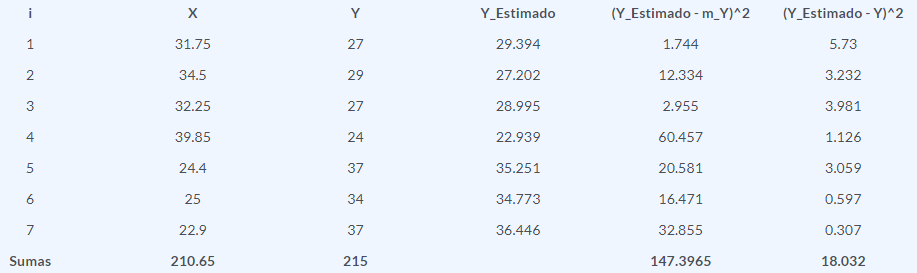

donde m_Y es la media de los datos de Y. Utilice una prueba de hipótesis para verificar si el modelo de regresion dado es significativo, con un nivel de significancia del 5%.

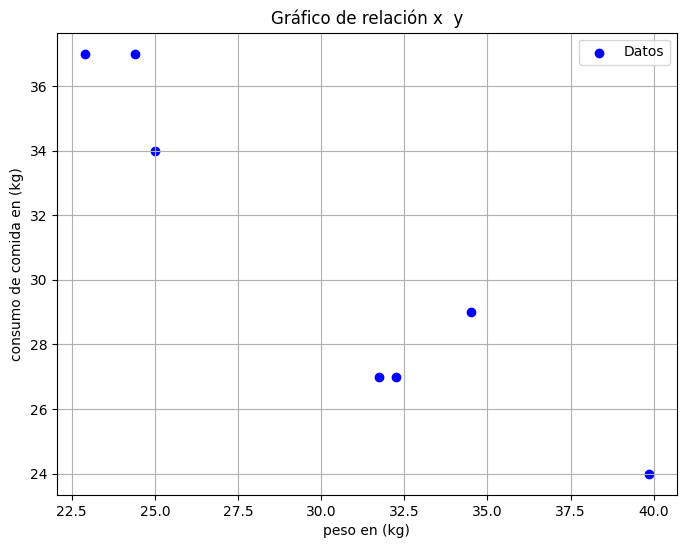


Ecuacion de Pronostico
Y = 54.6953 + -0.7969 X


,X,Yi,Yi=B0+B1X,SCR,SCE
0,31.75,27,29.3937,1.7440,5.7298
1,34.50,29,27.2023,12.3341,3.2317
2,32.25,27,28.9953,2.9550,3.9812
3,39.85,24,22.9388,60.4584,1.1261
4,24.40,37,35.2509,20.5807,3.0594
5,25.00,34,34.7728,16.4714,0.5972
6,22.90,37,36.4463,32.8558,0.3066
7,210.65,215,215.0001,147.3994,18.0320


Media Yi= 30.7143

SCT = 147.3994 + 18.032  = 165.431


,GL,SC,CM,FC,FTAB
Regresion,1,147.3994,147.3994,40.8716,6.6079
Residual(Error),5,18.0320,3.6064,0.0000,0.0000
Total,6,165.4310,0.0000,0.0000,0.0000


Conlusión: Con un nivel de significancia del 5.0 % se rechaza la Hipotesis nula . Por lo tanto, se concluye que si 
existe relacion lineal entre peso en (kg) y consumo de comida en (kg)


In [21]:
# Datos
#pregunta= "¿Cuánto en Promedio recibirá de propina un moso que se ha demorado en atender 3.5 minutos?"
#VariableX = 3.5
x = [31.75,34.5,32.25,39.85,24.4,25,22.9]
TextX = "peso en (kg)"
y = [27,29,27,24,37,34,37]
TextY = "consumo de comida en (kg)"
a = 0.05
n = len(x)

#------------------------------------------------
# Creacion y muestra en pantalla del grafico
plt.figure(figsize=(8, 6))
plt.scatter(x, y, color='blue', label='Datos')
# Personalizar el gráfico
plt.title('Gráfico de relación x  y')
plt.xlabel(TextX)
plt.ylabel(TextY)
plt.grid(True)
plt.legend()
# Mostrar el gráfico
plt.show()
#-----------------------------------------------

# Calculo x*y | x^2 | y^2
xy=[]
x2=[]
y2=[]
for posC,numero in enumerate(x):
    valorXY = numero*y[posC]
    valorX2 = numero**2
    valorY2 = y[posC]**2
    xy.append(valorXY)
    x2.append(valorX2)
    y2.append(valorY2)

# CALCULO DE COEFICIENTES PRACTICO
# PASO 1.
NuB1 = (n*sum(xy))-(sum(x)*sum(y))
DeNB1 = (n*sum(x2))-(sum(x)**2)
B1 = round(NuB1/DeNB1,4)
#print("\nPASO 1\nB1 =",NuB1,"/",DeNB1," =",B1)

# PASO 2.
NuB0 = (sum(y)-B1*sum(x))
B0 = round(NuB0/n,4)
#print("\nPASO 2\nB0 =",NuB0,"/",n," =",B0)

print("\nEcuacion de Pronostico\nY =",B0,"+",B1,"X")

# Calculamos Y=B0+B1X
yBoB1X = []
for posC,numero in enumerate(x):
    valor = round(B0+B1*numero,4)
    yBoB1X.append(valor)
promedioyBoB1X = sum(yBoB1X)/n

# Calculamos SCR
Scr = []
for posC,numero in enumerate(yBoB1X):
    valor = round((numero-promedioyBoB1X)**2,4)
    Scr.append(valor)

# Calculamos SCE
Sce = []
for posC,numero in enumerate(yBoB1X):
    valor = round((numero-y[posC])**2,4)
    Sce.append(valor)

# Crear un DataFrame 
Tabla1 = {
    'X': x+[sum(x)],
    'Yi': y+[sum(y)],
    'Yi=B0+B1X': yBoB1X+[sum(yBoB1X)],
    'SCR': Scr+[sum(Scr)],   
    'SCE': Sce+[sum(Sce)]  
}
df = pd.DataFrame(Tabla1)
df = df.rename(index={10:'TOTAL'})

# Mostrar el DataFrame
display(df)

# Calculamos SCT
Sct = round(sum(Scr)+sum(Sce),3)

print("Media Yi=",promedioyBoB1X)
print("\nSCT =",sum(Scr),"+",sum(Sce)," =",Sct)

# ------------------Cuadro ANOVA------------------------
ResidualEror = n-2
cmREror = sum(Sce)/ResidualEror
Fc = round((sum(Scr)/1)/(sum(Sce)/(n-2)),4)
Ft = round(f.ppf(1-a,1,n-2),4)

Anova = {
    'GL': [1,ResidualEror,n-1],
    'SC': [sum(Scr), sum(Sce),Sct],
    'CM': [sum(Scr), cmREror, 0],  
    'FC': [Fc, 0, 0],   
    'FTAB': [Ft, 0, 0]  
}
tablaAnova = pd.DataFrame(Anova, index=['Regresion', 'Residual(Error)', 'Total'])
# Mostrar el DataFrame
display(tablaAnova)

# Conclusion
conclusion=""
sn = ""
if Fc>Ft:
    conclusion="se rechaza la Hipotesis nula"
    sn="si"
else:
    conclusion="se acepta la Hipotesis nula"
    sn = "no"
    
print("Conlusión: Con un nivel de significancia del",a*100,"%",conclusion,". Por lo tanto, se concluye que",sn,"\nexiste relacion lineal entre",TextX,"y",TextY)